In [19]:
library(Matrix)
library(glmGamPoi)
library(scran)

In [10]:
counts <- readMM('../../data/fucci/matrix.mtx')

In [6]:
meta <- read.csv('../../data/fucci/meta.csv', row.names=1)

In [20]:
sf <- calculateSumFactors(as.matrix(counts))

Warning message in .guess_min_mean(x, min.mean = min.mean, BPPARAM = BPPARAM):
“assuming UMI data when setting 'min.mean'”


In [22]:
length(sf)

[1] 888

In [25]:
df_fit <- data.frame('x1'=cos(meta$theta), 
                 'x2'=sin(meta$theta), 
                 'y'=(meta$nCount_RNA)
                 )
df_fit$x3 <- df_fit$x1-df_fit$x2

In [26]:
fit_nosf <- glm_gp(as.matrix(counts), design=model.matrix(as.formula('~x3'), data=df_fit), size_factors=FALSE)
p_nosf <- test_de(fit_nosf, contrast=`x3`)
fit_sf <- glm_gp(as.matrix(counts), design=model.matrix(as.formula('~x3'), data=df_fit), size_factors=df_fit$y)
p_sf <- test_de(fit_sf, contrast=`x3`)

In [28]:
df_result_one <- data.frame(before=p_nosf$pval, after=p_sf$pval, before_adj=p_nosf$adj_pval,after_adj=p_sf$adj_pval)
write.csv(df_result_one, 'fig1g.csv')

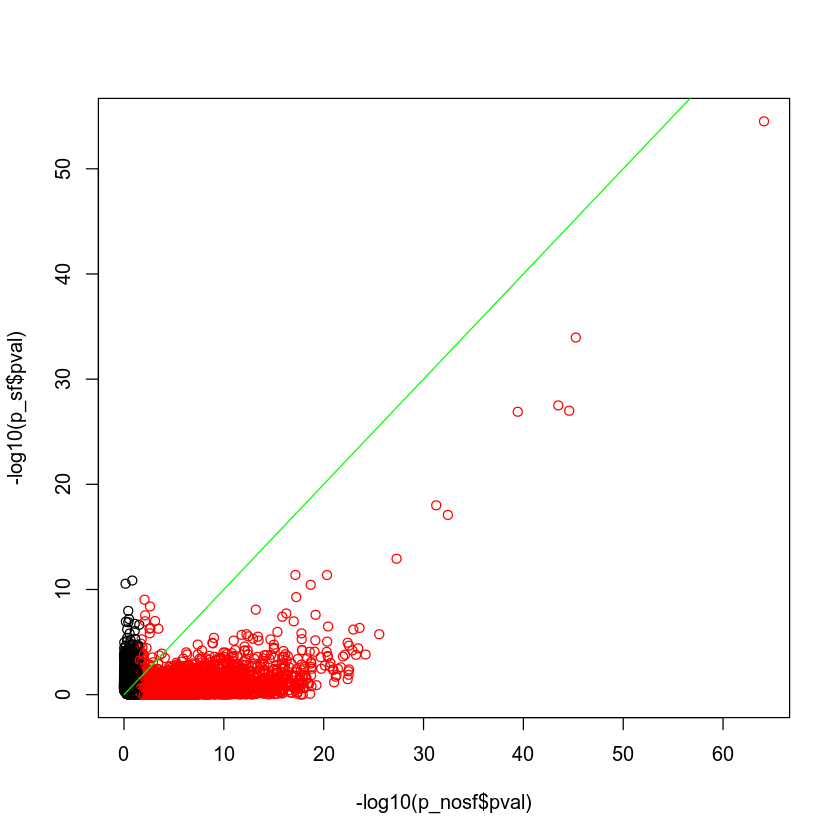

In [27]:
to_plot = p_nosf$adj_pval < 0.05
cols = ifelse(to_plot, 'red', 'black')
plot(-log10(p_nosf$pval), -log10(p_sf$pval), col=cols, cex=1)

lines(0:100,0:100,col='green')